<a href="https://colab.research.google.com/github/weasel-codes/google-colab/blob/udemy-dl/Regularization_In_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization
* **Underfit**
  * If we built an algo that doesnt fit our training set very well, we end up with under fitting condition.
  * Underfitting results in High Variance as model is good at predicting new test data.
  * Underfitting result in low bias as our algo doesnt very well fit training set.
* **Overfit**
  * If our algo tries to satisfy all inputs, we end up with very high degree polynomial algo resulting in Overfitting.
  * Overfitting results in High Bias as our model tightly tries to satisfy training data.
  * Overfitting results in low variance as our algo is prone to wrong/false prediction in case test data are not of the same type as that of training data.
* Through **regularization** we aim at finding the sweet spot btw underfitting and overfitting without loosing any important feature and reducing the test error.

A simple neural network with MNIST dataset:

In [1]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.optimizers import SGD

In [2]:
(X_Train,Y_Train),(X_Test,Y_Test)=mnist.load_data()
print("Train Data : \t", X_Train.shape)
print("Test Data : \t", Y_Train.shape)
print("Train Output : \t", X_Test.shape)
print("Test Output : \t", Y_Test.shape)

Train Data : 	 (60000, 28, 28)
Test Data : 	 (60000,)
Train Output : 	 (10000, 28, 28)
Test Output : 	 (10000,)


Output Value :  5


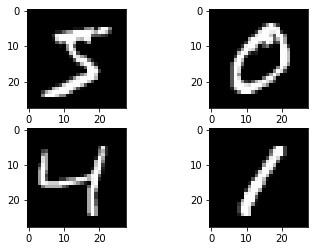

In [3]:
print("Output Value : ", Y_Train[0])
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(X_Train[0],cmap='gray')
axarr[0,1].imshow(X_Train[1],cmap='gray')
axarr[1,0].imshow(X_Train[2],cmap='gray')
axarr[1,1].imshow(X_Train[3],cmap='gray')

plt.show()

In [4]:
# Categorical encoding
print("Y-Value before categorizing : ", Y_Train[0])
Y_Train=np_utils.to_categorical(Y_Train)
Y_Test=np_utils.to_categorical(Y_Test)
print("Y-Value after categorizing : ", Y_Train[0])

Y-Value before categorizing :  5
Y-Value after categorizing :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# Normalizing Grey-scale values 
X_Train=X_Train/255
X_Test=X_Test/255
print(X_Train[5,15:20,15:20])
print("After PreProcessing Train Data : \t", X_Train.shape)
print("After PreProcessing Test Data : \t", Y_Train.shape)
print("After PreProcessing Train Output : \t", X_Test.shape)
print("After PreProcessing Test Output : \t", Y_Test.shape)

[[0.94901961 0.98823529 0.98823529 0.90588235 0.45882353]
 [0.81568627 0.98823529 0.98823529 0.98823529 0.98823529]
 [0.99215686 0.96862745 0.50588235 0.67843137 0.98823529]
 [0.84705882 0.25490196 0.         0.05490196 0.28235294]
 [0.11372549 0.         0.         0.         0.        ]]
After PreProcessing Train Data : 	 (60000, 28, 28)
After PreProcessing Test Data : 	 (60000, 10)
After PreProcessing Train Output : 	 (10000, 28, 28)
After PreProcessing Test Output : 	 (10000, 10)


In [6]:
# Basic Neural Network
# Define model architecture
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

# Compile model
sgd1 = SGD(lr=0.1) # Sets learning rate. 
model.compile(loss='categorical_crossentropy',
              optimizer=sgd1,
              metrics=['accuracy'])
 
# Fit model on training data
h1=model.fit(X_Train, Y_Train, batch_size=32, epochs=10, verbose=1, validation_split=.1)
 
# Evaluate model on test data.
score_neural = model.evaluate(X_Test, Y_Test, verbose=0)
# This returns only a score, so you will need to use another function for 
# extracting predicted labels for your confusion matrix. Use this line for that:
#classes = model.predict_classes(X_test, batch_size=32)
print(h1.history['accuracy'])
print(h1.history.keys())
print(h1.history['val_accuracy'])
print('Validation score:', score_neural[0])
print('Validation accuracy:', score_neural[1])

Epoch 1/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.2903 - accuracy: 0.9101 - val_loss: 0.1702 - val_accuracy: 0.9423
Epoch 2/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1027 - accuracy: 0.9685 - val_loss: 0.0883 - val_accuracy: 0.9737
Epoch 3/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0687 - accuracy: 0.9789 - val_loss: 0.0723 - val_accuracy: 0.9778
Epoch 4/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.1040 - val_accuracy: 0.9690
Epoch 5/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.0360 - accuracy: 0.9888 - val_loss: 0.0901 - val_accuracy: 0.9738
Epoch 6/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0823 - val_accuracy: 0.9770
Epoch 7/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0778 -

## Types of Regularization

### Early Stopping
* Early stopping is a kind of cross-validation strategy where we keep one part of the training set as the validation set. 
* When we see that the performance on the validation set is getting worse, we immediately stop the training on the model. This is known as **Early stopping**.

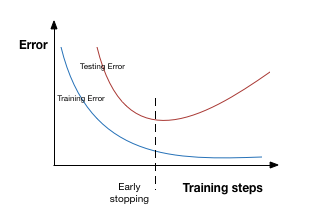

* In the above image, we will stop training at the dotted line since after that our model will start overfitting on the training data.

### Dropout Regularization
* To reduce overfitting, we can randomly drop some neurons randomly.
* At every iteration, DPR randomly selects some nodes and removes them along with all of their incoming and outgoing connections
* A factor specifies this rate of dropout in each layer specifying no. of neurons to drop out of all.
* When we drop neurons, our neuron cannot comletely rely on one input as we dropped at random.
* In this case we reduce chances of overfitting as there is no Bias and as a result of it no feature comes out as prominent among all.
* **Due to these reasons, dropout is usually preferred when we have a large neural network structure in order to introduce more randomness.**


In [10]:
# Dropout Neural Network
model_dropout = Sequential()
model_dropout.add(Flatten(input_shape=(28,28)))
model_dropout.add(Dense(500,activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(500,activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(500,activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(500,activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(500,activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(10,activation='softmax'))

In [11]:
# Compile model
sgd1 = SGD(lr=0.1) # Sets learning rate. 
model_dropout.compile(loss='categorical_crossentropy',
              optimizer=sgd1,
              metrics=['accuracy'])
 
# Fit model on training data
h1_dropout=model_dropout.fit(X_Train, Y_Train, batch_size=32, epochs=10, verbose=1, validation_split=.1)
 
# Evaluate model on test data.
score_dropout = model_dropout.evaluate(X_Test, Y_Test, verbose=0)
# This returns only a score, so you will need to use another function for 
# extracting predicted labels for your confusion matrix. Use this line for that:
#classes = model.predict_classes(X_test, batch_size=32)
print(h1_dropout.history['accuracy'])
print(h1_dropout.history.keys())
print(h1_dropout.history['val_accuracy'])
print('Validation score:', score_dropout[0])
print('Validation accuracy:', score_dropout[1])

Epoch 1/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.7150 - accuracy: 0.7654 - val_loss: 0.1596 - val_accuracy: 0.9540
Epoch 2/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.3069 - accuracy: 0.9161 - val_loss: 0.1154 - val_accuracy: 0.9650
Epoch 3/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.2482 - accuracy: 0.9335 - val_loss: 0.1033 - val_accuracy: 0.9713
Epoch 4/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.2138 - accuracy: 0.9431 - val_loss: 0.0873 - val_accuracy: 0.9747
Epoch 5/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1888 - accuracy: 0.9493 - val_loss: 0.0887 - val_accuracy: 0.9743
Epoch 6/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1736 - accuracy: 0.9532 - val_loss: 0.0919 - val_accuracy: 0.9737
Epoch 7/10
1688/1688 [==============================] - 24s 14ms/step - loss: 0.1571 - accuracy: 0.9576 - val_loss: 0.0818 -

### L2

In [6]:
from keras import regularizers

In [7]:
# Dropout Neural Network
model_l2 = Sequential()
model_l2.add(Flatten(input_shape=(28,28)))
model_l2.add(Dense(500,activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(500,activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(500,activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(500,activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(500,activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(10,activation='softmax'))

In [8]:
# Compile model
sgd1 = SGD(lr=0.1) # Sets learning rate. 
model_l2.compile(loss='categorical_crossentropy',
              optimizer=sgd1,
              metrics=['accuracy'])

# Fit model on training data
h1_l2=model_l2.fit(X_Train, Y_Train, batch_size=32, epochs=10, verbose=1, validation_split=.1)
# Evaluate model on test data.
score_l2 = model_l2.evaluate(X_Test, Y_Test, verbose=0)
# This returns only a score, so you will need to use another function for 
# extracting predicted labels for your confusion matrix. Use this line for that:
#classes = model.predict_classes(X_test, batch_size=32)
print(h1_l2.history['accuracy'])
print(h1_l2.history.keys())
print(h1_l2.history['val_accuracy'])
print('Validation score:', score_l2[0])
print('Validation accuracy:', score_l2[1])

Epoch 1/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.5526 - accuracy: 0.9091 - val_loss: 0.3537 - val_accuracy: 0.9715
Epoch 2/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.3513 - accuracy: 0.9692 - val_loss: 0.3670 - val_accuracy: 0.9627
Epoch 3/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.3106 - accuracy: 0.9773 - val_loss: 0.3201 - val_accuracy: 0.9747
Epoch 4/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2801 - accuracy: 0.9833 - val_loss: 0.2996 - val_accuracy: 0.9763
Epoch 5/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2586 - accuracy: 0.9867 - val_loss: 0.2902 - val_accuracy: 0.9770
Epoch 6/10
1688/1688 [==============================] - 26s 15ms/step - loss: 0.2387 - accuracy: 0.9894 - val_loss: 0.2693 - val_accuracy: 0.9813
Epoch 7/10
1688/1688 [==============================] - 25s 15ms/step - loss: 0.2239 - accuracy: 0.9909 - val_loss: 0.2626 -